In [125]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
import sys
sys.path.insert(0, '/data/programs/auto_alignment_bubble_segmentation/program')
import os
import glob

import tifffile
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

import segmentation

In [127]:
def preprocess(img):
    if img.ndim == 3:
        img = rgb2gray(img)
    return img

In [134]:
img = tifffile.imread('data/raw/cell_bw_1s_000.tif')
# img = tifffile.imread('data/raw/cell_color_1s_000.tif')
# flist = glob.glob('/home/8ididata/CCD_Test/*15*.tif')
# print(flist)
# img = tifffile.imread(flist[0])
img = preprocess(img)

  0%|                                                                                                                                                                                                                  | 0/59 [00:00<?, ?it/s]

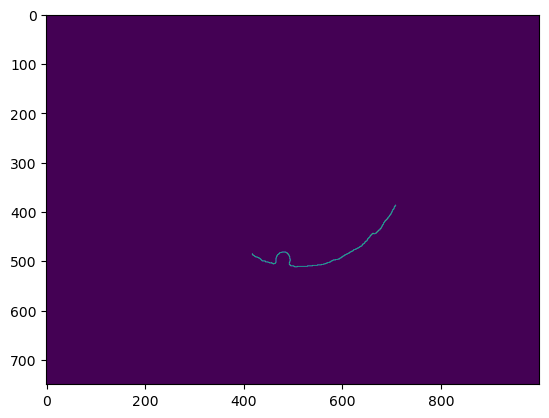

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 121.22it/s]


In [135]:
segmentor = segmentation.BubbleSegmentor(downsample=4)
segmentor.set_camera_image(img)
scannable_mask = segmentor.run(return_original_scale=False)
cell_window_mask = segmentor.cell_window_mask
img_ds = segmentor.image

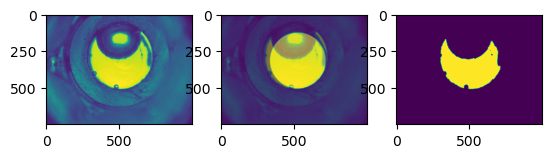

In [136]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(img_ds)
ax[1].imshow(img_ds)
ax[1].imshow(cell_window_mask, alpha=0.5)
ax[2].imshow(scannable_mask, alpha=1)
plt.show()